# COGS 118A - Final Project

# Predicting Financial Health Using Bank Marketing Data

## Group members

- Andy Chow
- Naomi Chin
- Andrew Lona
- Jiaqi Liu

# Abstract 

This project aims to make a model that can find the underlying factors that contribute to a person's financial health and how different demographics may affect the financial health. We will be using the UCI bank marketing data set to obtain demographic information. We will be using Support Vector Machine model and K Nearest Neighbors multiclass classification to predict bank account balances, with the possibly of using Principle Component Analysis to determine the most significant contributors to financial status. We will be using confusion matrix, F1 score, ROC-AUC score, learning curve, and AIC and BIC score comparison to evaluate model performance.

# Background

Making money and having a large bank account balance is a goal that many strive for. But what factors contribute to how much money people have in their accounts? There's the obvious job type and age that typically have an impact on salary and thus bank account balnce, but what other attributes have an influence, and to what degree?

There have been studies on how different demographics affect salary or bank account balance. For example, an article by ValuePenguin breaks down how income and age affect balances. Unsuprisingly, as income increases, the average balance increases. In addition, balance increases as age increases up to the 65-74 age range, but after 75+ years, the average balance decreases <a name="moon"></a>[<sup>[1]</sup>](#moonnote).
There are also a multitude of studies that have looked at how different personal attributes affect earnings. While earnings are not exactly bank account balance, we have already seen how income affect the balance. A report by Social Security found that men with bachelor's degrees earn about \\$900,000 more during their lifetime than men with only high school diplomas. For women, the difference is about \\$630,000. The report then took into account certain socio-demographic variables that could influence earnings; after recalculations, men and women with bachelor's  degrees earn \\$655,000 and \\$450,000, respectively, more than their high school graduate counterparts <a name="social"></a>[<sup>[2]</sup>](#socialnote). Further, Social Security looks into how savings are affected by marital status. It was found that married people were much more likely to have an individual retirement account (IRA) or defined contribution (DC). This likely means that married people are better at saving money due to multiple reasons. Cost sharing, long term commitment, and future-focused behavior may be contributers to this behavior <a name="relationship"></a>[<sup>[3]</sup>](#relationshipnote).

We are going to analyze not only what attributes collectively contribute to bank account balance, but also how much influence each attribute has. The goal of our research and analysis is to find what demographics and lifestyle choices correlate to bank account balances. While the results of this research are intended to be informative knowledge, they could serve as guidance to increase bank account balance. This information could also be used for banks to determine what clients to focus on.

# Problem Statement

The problem we hope to solve is, how well can a person’s demographic information predict their financial health? In this instance, financial health is determined by the balance of a person’s bank account (high is good, low is bad). Although a single bank account balance cannot directly indicate a person’s overall financial health, it is a reasonable assumption that a higher bank account balance correlates to better financial health. Our analysis will first determine which aspect of a person’s demographic information has the most influence on bank account balance through a Principal Component Analysis (PCA). Then we will determine how well a person’s age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status contribute towards determining a person’s bank account balance. To predict the balances, we will compare Support Vector Machine (SVM) and K Nearest Neighbors (KNN) models for multiclass classification.

# Data

The data that will be used is the UCI bank marketing data set. It gives information of direct marketing campaigns of a Portuguese banking institution.

Data link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- 17 of variables, 45211 observations
- each observation consists of one marketing call from a Portuguese banking institution to assess if the bank term deposit would be subscribed (by the client). These outcomes may not always results in subscription, and follow-up calls are sometimes made to the same client.
- critical variables are
    - balance: at the moment we are acting on assumption, but it should be the current account balance of the client contacted
    - independent variables such as (numerical age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status)
- cleaning/transformations
    - the data is pretty spotless in a wrangling sense, albeit most of the categorical variables do have an unknown or nonexistent value which will need to be accounted for.
    - we will also need to one-hot encode all categorical IVs such as marital status and job type (not dummy coding).


# Proposed Solution

We are interested in predicting the bank account balance of individuals given their demographic data provided by the bank. Since the account balance variable is independent from other observations, we can convert the continuous range into categorical bins based on quartile ranges with the addition of "below 0".


We will first perform a PCA to decorrelate the inputs to analyze the unique contributions from each variable. This will help us to determine what features are the most significant contributors to bank account balance.


We will then use a SVM model to conduct the multiple classification. In addition, preliminary observation of the target feature reveals that the mean is significantly smaller than the median, which indicates that there are outliers in the dataset. We will be using a ElasticNet regularization primarily to limit the influence of outliers in the L1 term but the L2 term also helps in reduction of the 17 present features. We will conduct a gradient descent with respect to the $\alpha$ term of the ElasticNet regularization since we are not completely sure how much to penalize for outliers. We will also apply a simple model using K Nearest Neighbors multiclass classification, and apply a model comparison metric to evaluate performance. We will use a Confusion Matrix and ROC-AUC analysis for model benchmarking to compare the SVM and KNN models.


We plan to use Pandas for data preprocessing and the modules provided in the SKLearn library to conduct our model implementation.

# Evaluation Metrics

Since we are dealing with a multiclass problem, in order to complete a general performance evaluation of models, we will convert our classes into multiple one-vs-rest classifications. For each instance, we will take each bank account bin as the positive class and all of the other bins as the negative class. So we will have n binary classifications where n is the number of bank account bins.


From there, we can create a confusion matrix for each on-vs-rest classification. The true and predicted classes will be used as inputs and the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) will be the outputs of the confusion matrix. We can then aggregate the TP, TN, FP, and FN from all of the classifications.


With the aggregate values, we will calculate the F1 score for each model. The F1 score is chosen because neither false positives nor false negatives are particularly penalizing to the final performance of the model. The F1 score is a function of precision and recall which account for false positives and false negatives, respectively.


$$
Precision = \frac{TP}{TP+FP} \\[15pt]
Recall = \frac{TP}{TP+FN} \\[15pt]
F1 = \frac{2*Precision*Recall}{Precision+Recall}
$$


We will also be calculating a Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score to compare the SVM and KNN models. The ROC-AUC is a good evaluation of a model because it is a measurement of how well a model can distinguish between positive and negative classes. In our case, how well a model completes the multiclass classification. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds. The ROC-AUC score ranges from 0 to 1; the larger the score, the better the performance of the model.


We will also use a learning curve to evaluate over or underfitting of the model. Finally we will include an Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) score comparison to compare models. These scores measure the relative quality of a model for a given dataset. The scores are calculated with the number of model parameters (k), the maximum value of the likelihood function (L), and the number of observations in the data.


$$
AIC = 2k-2ln(L) \\[15pt]
BIC = kln(n)-2ln(L)
$$

# Results

### Data Wrangling

We will first import the Banking Dataset and the packages required to run our models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bank = pd.read_csv('data/bank-full.csv', sep=';')
print(bank.head())

# other imports needed for ML and data cleaning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score


# we can't use f1, or anything conf matrix metrics due to no probabilities
from sklearn.metrics import accuracy_score, roc_curve, auc, make_scorer, roc_auc_score, ConfusionMatrixDisplay, f1_score, confusion_matrix, accuracy_score, classification_report, RocCurveDisplay, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, LearningCurveDisplay, learning_curve

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Next we need to check data that allows for unknown values.

In [2]:
# Number of unknown values in the data
print('job:', bank[bank.job == 'unknown'].shape[0])
print('education:', bank[bank.education == 'unknown'].shape[0])
print('contact:', bank[bank.contact == 'unknown'].shape[0])
print('poutcome:', bank[bank.poutcome == 'unknown'].shape[0])
print('pdays:', bank[bank.pdays == -1].shape[0])  # -1 means client was not previously contacted

job: 288
education: 1857
contact: 13020
poutcome: 36959
pdays: 36954


After looking at the data, we have decided to remove the columns 'contact', 'day', 'pdays', 'poutcome'. We also remove the columns 'duration' since it is heavily correlated with 'y'.

In [3]:
bank = bank.drop(['contact', 'day', 'pdays', 'poutcome', 'duration'], axis=1)
print(bank.head())

   age           job  marital  education default  balance housing loan month  \
0   58    management  married   tertiary      no     2143     yes   no   may   
1   44    technician   single  secondary      no       29     yes   no   may   
2   33  entrepreneur  married  secondary      no        2     yes  yes   may   
3   47   blue-collar  married    unknown      no     1506     yes   no   may   
4   33       unknown   single    unknown      no        1      no   no   may   

   campaign  previous   y  
0         1         0  no  
1         1         0  no  
2         1         0  no  
3         1         0  no  
4         1         0  no  


Moving onto numerical data. We first checked balance.

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


<Axes: xlabel='balance', ylabel='Count'>

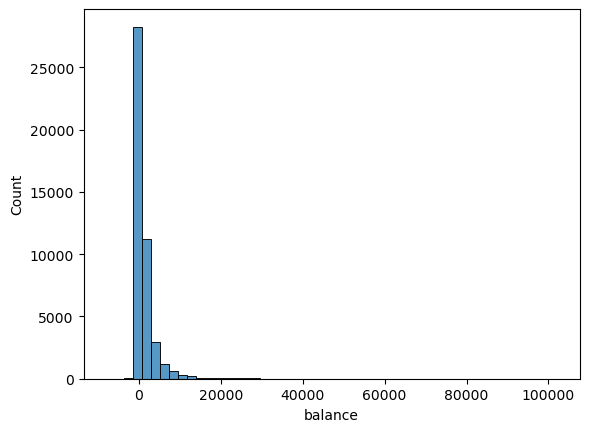

In [4]:
print(bank['balance'].describe())
sns.histplot(data=bank, x='balance', bins=50)

As the above histplot shows, the distribution of balance is very heavily right skewed, with many cluster around 0. This is not useful. Therefore, we will take the log of balance. We will address how we incorporate it in the encoding section, including how to manage a balance of 0, but for now we would like to visualize the resulting data.

In [5]:
bank_poslog = np.array(bank[bank.balance > 0].balance)
bank_poslog = np.log(bank_poslog)
bank_neglog = np.array(bank[bank.balance < 0].balance)
bank_neglog = np.log(-bank_neglog)

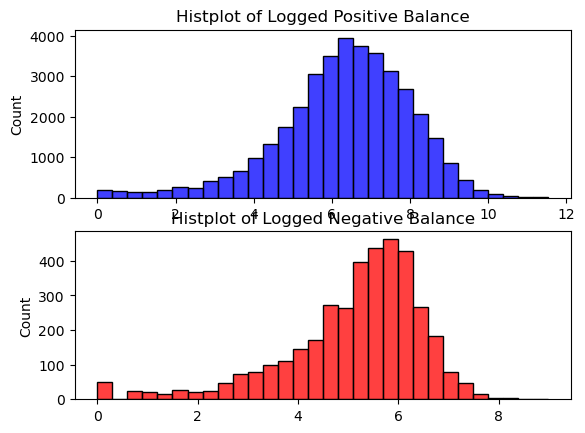

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# plot of logged positive and negative balances
sns.histplot(data=bank_poslog, color='blue', bins=30, ax=ax1)
ax1.title.set_text('Histplot of Logged Positive Balance')
sns.histplot(data=bank_neglog, color = 'red', bins=30, ax=ax2)
ax2.title.set_text('Histplot of Logged Negative Balance')

The resulting plot is relatively gaussian. Hence we decide to use that to maximize the prediction power of the model.

The next data is age.

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Count'>

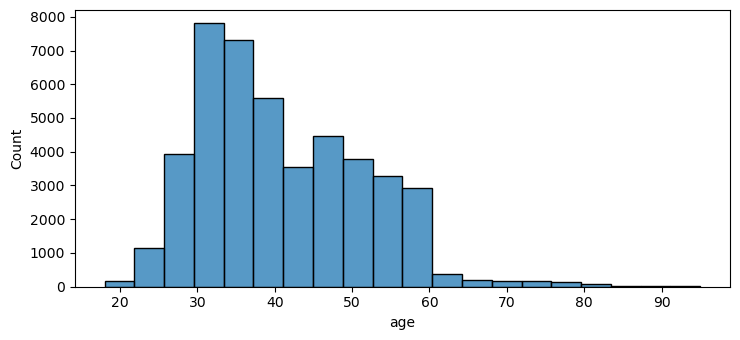

In [7]:
print(bank['age'].describe())
sns.histplot(data=bank, x='age', bins=20)

The distribution of age is fairly normal. No processing is needed.

### Encoding

First we will perform dummy encoding to the binary data, and one-hot encoding to categorical data

In [8]:
dummy_list = []
one_hot_list = []
# check to see what vars can be dummied
for column in bank.nunique().keys():
    unique_value = bank.nunique()[column]
    if unique_value == 2:
        dummy_list.append(column)
    elif unique_value > 2 and (str(bank[column].dtype)) != 'int64':
        one_hot_list.append(column)

In [9]:
dummy_dict = {}
# Dummy encoding
# they all have yes or no, so we can do the same for all
for column in dummy_list:
    dummy_dict[column] = bank[column].eq('yes').mul(1)

In [10]:
# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_bank = bank[one_hot_list]
encoder.fit(one_hot_bank)
# Following line is used for validation
# encoder.inverse_transform(one_hot_bank)
one_hot_bank = encoder.transform(one_hot_bank).toarray()
one_hot_labels = encoder.categories_

counter = 0
bank_dict = {}
for i in range(0, len(one_hot_labels)):
    for column in one_hot_labels[i].tolist():
        bank_dict[column] = one_hot_bank[:,counter]
        counter += 1

In [11]:
# now creating new df
bank_dict.update(dummy_dict)
bank_coded = pd.DataFrame(bank_dict)
bank_coded.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,jun,mar,may,nov,oct,sep,default,housing,loan,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0


Then we process and add the numerical datas to the encoding.

In [12]:
# constant that represents 0
zero_rep = -3

bank_log = bank.balance
bank_log += np.e ** zero_rep
bank_coded['age'] = bank.age
bank_coded['balance'] = np.log(bank_log)

# bank_poslog = bank.balance
# bank_poslog[bank_poslog < 0] = 0  # set all negative numbers to 0
# bank_poslog += np.e ** zero_rep   # add a small constant to avoid ln(0)
# bank_poslog = np.log(bank_poslog)
#
# bank_neglog = -bank.balance
# bank_neglog[bank_neglog < 0] = 0  # set all negative numbers to 0
# bank_neglog += np.e ** zero_rep   # add a small constant to avoid ln(0)
# bank_neglog = np.log(bank_neglog)
#
# bank_coded['pos_balance'] = bank_poslog
# bank_coded['neg_balance'] = bank_neglog

/Users/j/opt/anaconda3/envs/Default/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# running continuous vars through standard scalar
col_names = ['age']
features = bank_coded[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['age'])
    ], remainder='passthrough')

bank_coded['age'] = ct.fit_transform(features)

# generating IQR and dropping rows which fall outside
Q1, Q3 = bank_coded["balance"].quantile([.25, .75]).tolist()
IQR = Q3 - Q1
bank_coded = bank_coded.query('(@Q1 - 1.5 * @IQR) <= balance <= (@Q3 + 1.5 * @IQR)')

# categorizing balance into quantiles
bank_coded['balance'] = pd.qcut(bank_coded['balance'], 4, labels=False)
bank_coded.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,may,nov,oct,sep,default,housing,loan,y,age,balance
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,0,1.606965,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0,1,0,0,0.288529,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,0,0.571051,2
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,0,-0.559037,0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,0,-1.218254,1


### Principal Component Analysis



We will next conduct a principal component analysis to see whether there are any features/combination of features that may contribute the most to the variance in the data. If there are, then it may help us in identifying potential key features as predictors. 

In [14]:
# PCA processing

# Preprocess the dataframe by transforming it to the origin with the standard scaler
scaled_df = StandardScaler().fit_transform(bank_coded)

# fit the PCA function
pca = PCA()
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)

# return the principal components
num_features = bank_coded.shape[1]

percent_variance = np.round(pca.explained_variance_ratio_ * num_features, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(percent_variance)+1)]

The scree plot visualizes the principal components by ranking it from most variance explained to least variance explained by percentage. Ideally we can identify a couple of principle comonents with very high percentage relative to others. If the distribution looks flat (such as in this case) then it means that all principal components have similar explanatory power and thus does not elucidate any particular combinations of features as predictive. 

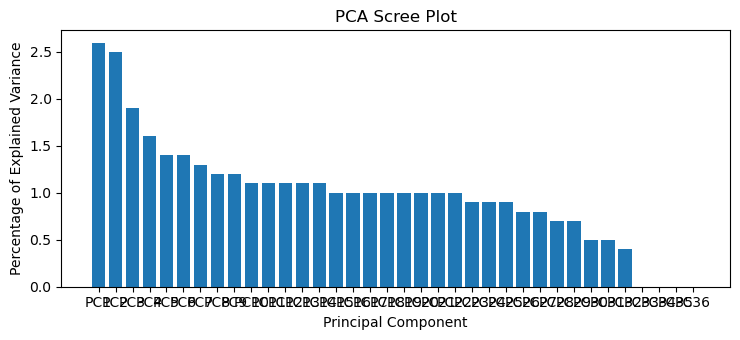

In [15]:
# Scree Plot
plt.bar(x=range(1,len(percent_variance)+1), height = percent_variance, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

### Models



In this section we explore a variety of different models to examine how we may predict financial health (again, operatioanlly defined here as bank balance) from bank marketing data.

The models that we use are the following:

1. Multiclass Support Vector Classifier
2. Multiclass Logistic Regression
3. K-Nearest Neighbors, K = 10
4. Decision Trees
5. Multi-Layer Perceptron
6. Random Forest
7. Stochastic Gradient Descent Hyperparameter Search


##### Setup: (Train-Test Split, Scorer Function)

In [16]:
# training and testing splits
# Pull Y variable out which is balance
X = bank_coded.iloc[:, 0:35].to_numpy()
y = bank_coded.iloc[:, 35:36].to_numpy().flatten()

# basic T/T/Split modeling due to large size of data
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

Setup A: Metric Scoring Function

In [19]:
def metrics_classification_scorer(y_train, y_test, y_pred, y_proba, show_stats = True, save_auc = False):
    """
    :param y_test: your testing data
    :param y_pred: your predictions generated from classifier
    :param y_proba: your probabilities generated from classifier
    :param show_stats: default is True, shows ROC Curve, and all other Metrics
    :param save_auc: saves AUC score if desired (must write to variable)
    :return: plots of ROC curve, Conf Matrix Metrics, and AUC Score
    """

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    # y_onehot_test.shape  # (n_samples, n_classes)

    if show_stats:
        RocCurveDisplay.from_predictions(
            y_onehot_test.ravel(),
            y_proba.ravel(),
            name="micro-average OvR",
            color="darkorange",
        )
        plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
        plt.axis("square")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25))
        plt.show()
    

    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_proba,
        multi_class="ovr",
        average="micro",
    )

    if show_stats:
        print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}\n")
        print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n")
        print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")
        #print(f'Average Cross Validation Score: {cross_val_score(model_fit, X, y, cv=20).mean()}%')

    # saves auc score if desired
    if save_auc: return micro_roc_auc_ovr

Setup B: Confusion Matrix Plotting Function

In [47]:
def plot_confusion_matrix(y_true,y_pred):

    # Compute confusion matrix
    cm = multilabel_confusion_matrix(y_true, y_pred)

    # Define class labels
    classes = ['Q1','Q2','Q3','Q4']

    # Create subplots for each label
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

    # Plot confusion matrix for each label
    for i, ax in enumerate(axs):
        ax.imshow(cm[i], interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(f'Confusion Matrix for {classes[i]}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        tick_marks = np.arange(2)
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(['False', 'True'])
        ax.set_yticklabels(['False', 'True'])
        ax.grid(False)
        thresh = cm[i].max() / 2.
        for j, k in np.ndindex(cm[i].shape):
            ax.text(k, j, format(cm[i][j, k], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i][j, k] > thresh else "black")

    plt.tight_layout()
    plt.show()

#### 1. Support Vector Machine

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  6.3min finished


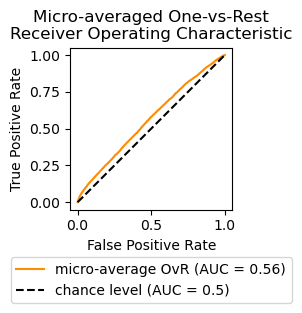

Micro-averaged One-vs-Rest ROC AUC score:
0.56

Test Set Accuracy : 30.378824672170957 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.31      0.35      0.33      3095
           1       0.27      0.23      0.25      3088
           2       0.27      0.22      0.24      3084
           3       0.34      0.41      0.37      3087

    accuracy                           0.30     12354
   macro avg       0.30      0.30      0.30     12354
weighted avg       0.30      0.30      0.30     12354



In [20]:
# should take about 3.5 minutes for a 4 core, ~3ghz machine with fast RAM
svm_clf = OneVsRestClassifier(estimator = SVC(probability = True, random_state = 1, kernel = 'rbf'), verbose = 3, n_jobs = 4)
svm_clf.fit(X_train_bank, y_train_bank)
svm_y_predict = svm_clf.predict(X_test_bank) # both predictions take around 3 min
svm_y_prob = svm_clf.predict_proba(X_test_bank)

svm_auc = metrics_classification_scorer(y_train_bank, y_test_bank, svm_y_predict, svm_y_prob, save_auc = True)


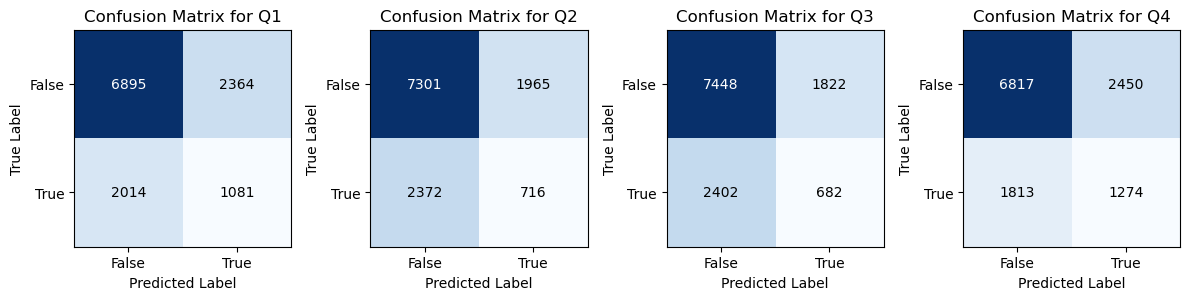

In [48]:
plot_confusion_matrix(y_test_bank, svm_y_predict)

#### 2. Logistic Regression

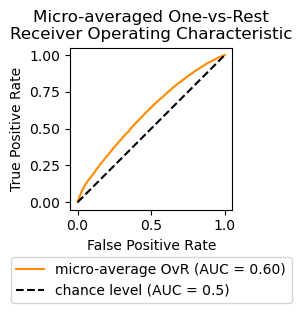

Micro-averaged One-vs-Rest ROC AUC score:
0.60

Test Set Accuracy : 33.75424963574551 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.34      0.51      0.41      3095
           1       0.30      0.24      0.26      3088
           2       0.30      0.10      0.15      3084
           3       0.37      0.50      0.43      3087

    accuracy                           0.34     12354
   macro avg       0.33      0.34      0.31     12354
weighted avg       0.33      0.34      0.31     12354



In [21]:
logit_fitted = LogisticRegression(max_iter = 10000, multi_class = 'ovr', solver = 'newton-cholesky').fit(X_train_bank, y_train_bank)
logit_y_pred = logit_fitted.predict(X_test_bank)
logit_y_prob = logit_fitted.predict_proba(X_test_bank)

logit_auc = metrics_classification_scorer(y_train_bank, y_test_bank, logit_y_pred, logit_y_prob, save_auc = True)

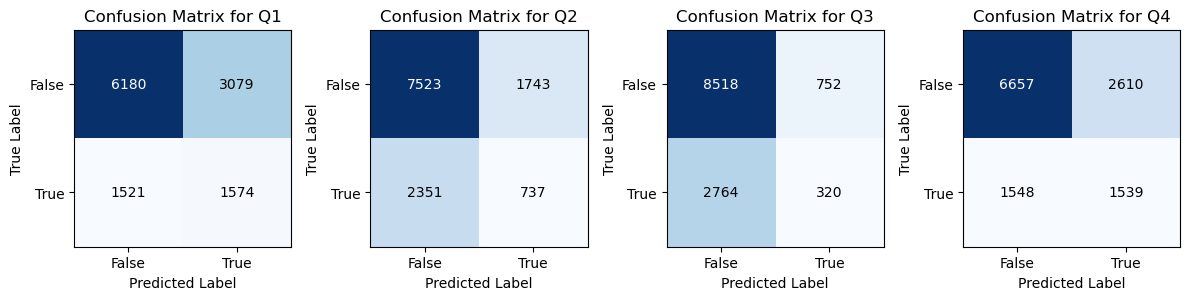

In [49]:
plot_confusion_matrix(y_test_bank, logit_y_pred)

#### 3. K-nearest Neighbours

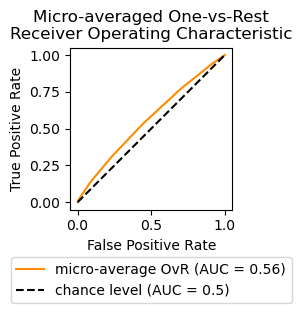

Micro-averaged One-vs-Rest ROC AUC score:
0.56

Test Set Accuracy : 30.435486482111056 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.31      0.40      0.35      3095
           1       0.28      0.29      0.28      3088
           2       0.28      0.22      0.24      3084
           3       0.35      0.31      0.33      3087

    accuracy                           0.30     12354
   macro avg       0.30      0.30      0.30     12354
weighted avg       0.30      0.30      0.30     12354



In [22]:
knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1).fit(X_train_bank, y_train_bank)
knn_y_pred = knn.predict(X_test_bank)
knn_y_prob = knn.predict_proba(X_test_bank)
knn_auc = metrics_classification_scorer(y_train_bank, y_test_bank, knn_y_pred, knn_y_prob, save_auc = True)

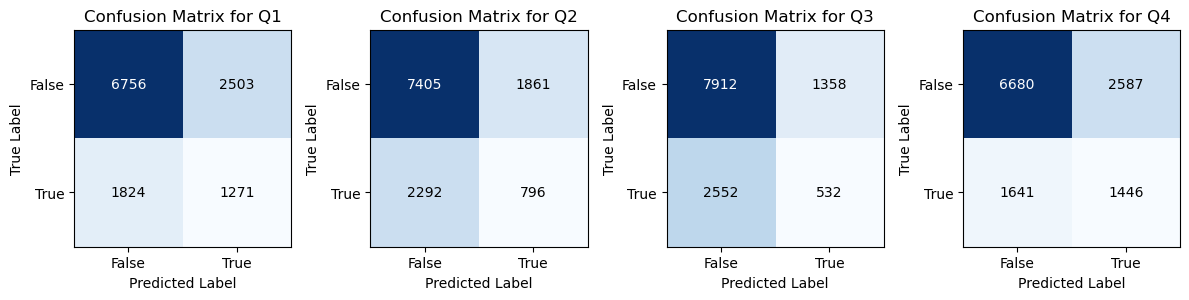

In [50]:
plot_confusion_matrix(y_test_bank, knn_y_pred)

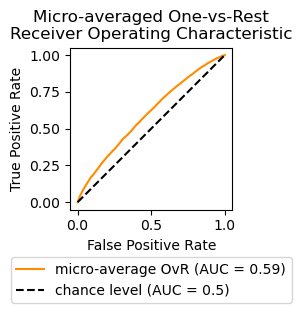

Micro-averaged One-vs-Rest ROC AUC score:
0.59

Test Set Accuracy : 32.72624251254654 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.34      0.41      0.37      3095
           1       0.30      0.26      0.28      3088
           2       0.28      0.17      0.22      3084
           3       0.36      0.47      0.41      3087

    accuracy                           0.33     12354
   macro avg       0.32      0.33      0.32     12354
weighted avg       0.32      0.33      0.32     12354



In [23]:
# possible to do a hyperparameter grid search using a loop such as...
auc_list = []
n = 500 # for now I had to cap it at 500. Computer falls asleep and python hangs so this is the most it can do unless
# I run it on datahub/datacruncher
max_auc = 0

for k in list(range(1, n, 2)):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn = knn_clf.fit(X_train_bank, y_train_bank)
    knn_y_pred = knn.predict(X_test_bank)
    knn_y_prob = knn.predict_proba(X_test_bank)
    current_auc = metrics_classification_scorer(y_train_bank, y_test_bank, knn_y_pred, knn_y_prob, show_stats = False, save_auc = True)

    if current_auc > max_auc:
        max_auc = current_auc
        best_knn = knn
    if k % 50 == 0:
        print(k ," of ", n)

# for n = 500, k = 369 is the best with AUC of 0.59
knn_grid_y_pred = best_knn.predict(X_test_bank)
knn_grid_y_prob = best_knn.predict_proba(X_test_bank)

metrics_classification_scorer(y_train_bank, y_test_bank, knn_grid_y_pred, knn_grid_y_prob, save_auc = False)

#### 4. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train_bank, y_train_bank)
tree_y_pred = tree.predict(X_test_bank)
tree_y_prob = tree.predict_proba(X_test_bank)

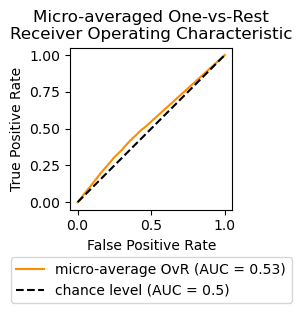

Micro-averaged One-vs-Rest ROC AUC score:
0.53

Test Set Accuracy : 28.72753763963089 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.30      0.36      0.32      3095
           1       0.27      0.29      0.28      3088
           2       0.27      0.25      0.26      3084
           3       0.31      0.26      0.28      3087

    accuracy                           0.29     12354
   macro avg       0.29      0.29      0.29     12354
weighted avg       0.29      0.29      0.29     12354



In [25]:
tree_auc = metrics_classification_scorer(y_train_bank, y_test_bank, tree_y_pred, tree_y_prob, save_auc = True)

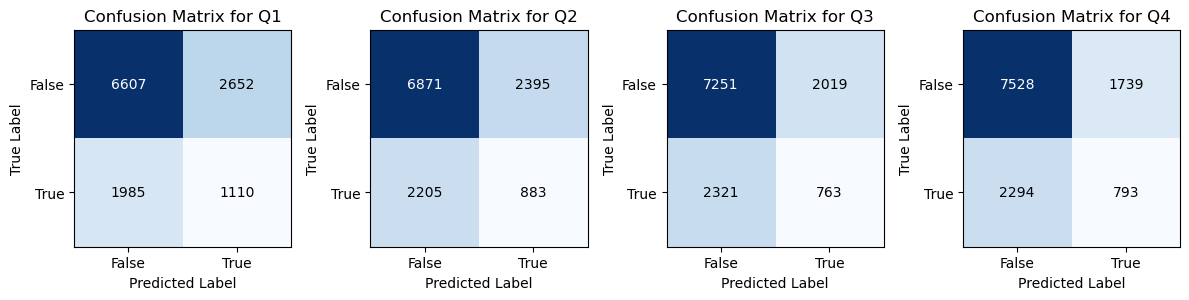

In [51]:
plot_confusion_matrix(y_test_bank, tree_y_pred)

#### 5. Multi-layer Perceptron

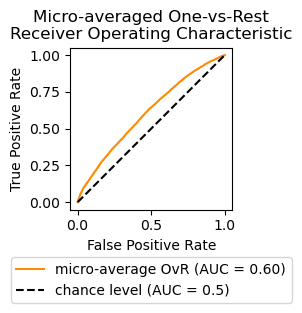

Micro-averaged One-vs-Rest ROC AUC score:
0.60

Test Set Accuracy : 33.26857697911608 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.48      0.39      3095
           1       0.30      0.20      0.24      3088
           2       0.29      0.18      0.22      3084
           3       0.38      0.47      0.42      3087

    accuracy                           0.33     12354
   macro avg       0.32      0.33      0.32     12354
weighted avg       0.32      0.33      0.32     12354



In [28]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes = (100,100), random_state=42, max_iter=100000, learning_rate_init= 0.00001)
mlp = mlp_clf.fit(X_train_bank, y_train_bank)
mlp_y_pred = mlp.predict(X_test_bank)
mlp_y_prob = mlp.predict_proba(X_test_bank)
mlp_auc = metrics_classification_scorer(y_train_bank, y_test_bank, mlp_y_pred, mlp_y_prob, save_auc = True)


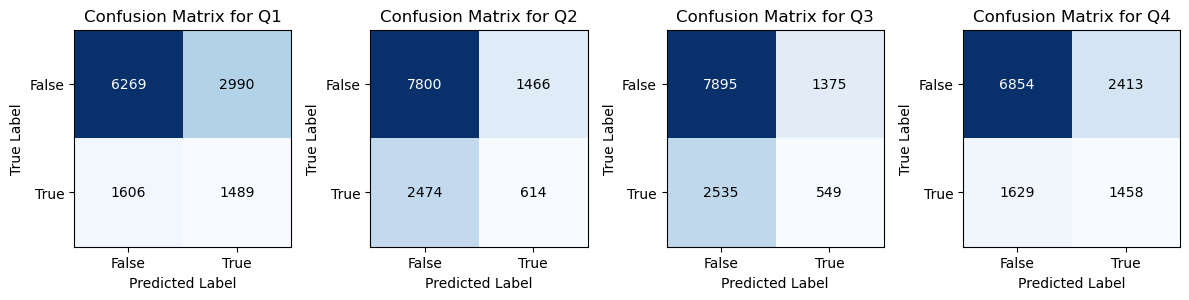

In [52]:
plot_confusion_matrix(y_test_bank, mlp_y_pred)

#### 6. Random Forest

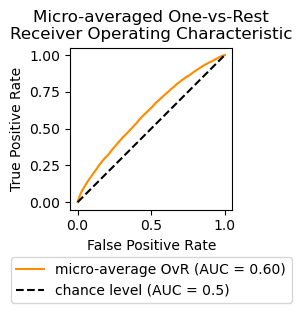

Micro-averaged One-vs-Rest ROC AUC score:
0.60

Test Set Accuracy : 33.51141330743079 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.53      0.41      3095
           1       0.30      0.20      0.24      3088
           2       0.28      0.10      0.15      3084
           3       0.37      0.52      0.43      3087

    accuracy                           0.34     12354
   macro avg       0.32      0.33      0.31     12354
weighted avg       0.32      0.34      0.31     12354



In [54]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42).fit(X_train_bank, y_train_bank)
forest_y_pred = forest.predict(X_test_bank)
forest_y_prob = forest.predict_proba(X_test_bank)
forest_auc = metrics_classification_scorer(y_train_bank, y_test_bank, forest_y_pred, forest_y_prob, save_auc = True)

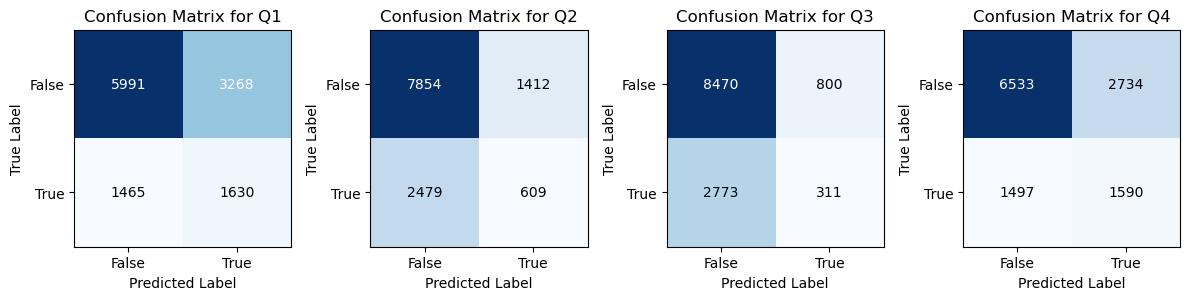

In [55]:
plot_confusion_matrix(y_test_bank, forest_y_pred)

#### 7. Stochastic Gradient Descent with Hyperparameter Search

In [ ]:
alpha = [0.1, 0.001, 0.0001, 0.00001, 0.000001]
loss = ['hinge', 'log_loss', 'perceptron']

test_accuracy = []
for l, a in zip(loss, alpha):
    sgd_clf = SGDClassifier(loss = l, max_iter = 10000000, alpha = a, penalty = 'l1')
    sgd_clf.fit(X_train_bank, y_train_bank)
    sgd_y_predict = sgd_clf.predict(X_test_bank) # both predictions take around 3 min
    #sgd_y_prob = sgd_clf.predict_proba(X_test_bank)

    test_accuracy.append(accuracy_score(y_test_bank, sgd_y_predict) * 100)

print(f'Max accuracy in parameter search: {np.max(test_accuracy)}')

33.26048243483892

#### 8. Post-Hoc Simple Correlation

<Axes: >

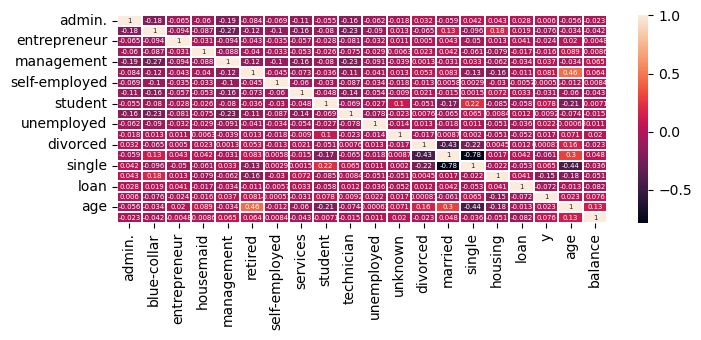

In [ ]:
sns.heatmap(bank_coded[['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed',
                        'services','student','technician','unemployed','unknown','divorced','married','single',
                        'housing','loan','y','age','balance']].corr(),annot=True,linewidth=0.1,annot_kws={"fontsize":5})

# Discussion

### Interpreting the result

Whereas in the proposed plan we originally only intended to compare SVM and KNN with the potential addition of Decision Trees, we ultimately conducted 8 model fits overall for the simple reason that no single model exceeded 33.7% in testing score accuracy while each ROC score was only slighly better than chance. After conducting our SVM with an accuracy score of 30.37% and a ROC score of 0.56, we were still rather optimestic that perhaps this poor model performance could be resolved with different models. After both KNN, and Decisions Trees both displayed similar or worse metrics, we begin to suspect that the data might not support the predictions that we had hypothesized. To validate the suspicion, we decided to exhuast as many models as feasible. All of which met an accuracy upper bound of around 30%; therefore our conclusion is that the predictor features does not encode enough information about bank customer account balance to accurately classify and predict. What was interesting however, is that all of the models hovered around the same accuracy score of around 30%. One would suspect that if the predictors truly encoded no information about the outcome, then the accuracy would not hold consistent across different models. However the low, yet consistent accuracy scores may be indicative of some sort of pattern though we are not sure of the implications.

Translating the quantitative results to interpretations within the context of our bank customer data, it seems that little to none of the social demographic information such as education, job placement, marital status, age, etc are strong predictors for how much money is saved in their bank accounts. As an extension of such, these afforementioned demographic information is also not a strong predictor for whether a bank customer is in debt or not. However, despite the lack of predictive power, we also encountered a weak predictive effect across multimple models. This, in combination with the relatively homogenous distribution of principal componenent's explanatory power, indicates that a certain amount of features do contribute slightly to balance categorization but is ultimately dominated by unknowable potential systematic effect. We hypthesize that a possible systematic effect is that regardless of social position, most people maintain relatively similar balances in to their bank accounts since those who have lower income obviously could not maintain a higher balance, while those who have a higher income have financial incentives to invest or maintian multiple bank accounts which dilutes their account balance. 


### Limitations

The limitation seems to be inherent to the data rather than than the methodology, which is reflected by the consistently low accruacy across all models of multiple types. This can be seen in the raw data where a significant amount of datapoints are clustered around 0 such that the histogram distrubtion of bank balances was extremely right skewed. We were able to circumvent the problem of skewed distribution through a log transform of the raw data, but this does not solve the inherent issue within the dataset. A potential source of metholdological limitation was how we transformed the continuous outcome variable in to discrete categorial bins. This had the limitation where an increased bin count would have likely resulted in better prediction but also exponentially increased computing time, and a lower bin count would have resulted in the opposite, respectively. We ultimately chose to categorize according to quantiles of the log transform which is on the side of lower bin counts. Perhaps with more computing resources, we could have chosen a higher bin count and thus a more granular (and more accurate) predictive outcome. 

### Ethics & Privacy

The main concern with prediction with real life data is the accuracies of our models. We are uncertain about the predictive power of the models and whether these models should be used to help with future marketing. One can misuse the models trained and infer possibly inaccurate conclusions on bank marketing.

Furthermore, the data used are from a Portuguese banking institution and may not be similar with maketing data of banking institutions of other countries. The marketing data of other banking institutions in Portugal might also differ. The model created might not be accurate to predict marketing results of other banking institutions.

Therefore, We are careful to disclose that the models we will generate are for reference only and we by no means guarantee they are accurate in predicting the market reception on banking. One needs to be cautious using the models trianed to predict patterns, generalize, and infer conclusions on bank marketing.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="moonnote"></a>1.[^](#moon): Moon, Chris (14 Sept 2022) Average U.S. Checking Account Balance: A Demographic Breakdown. *ValuePenguin*. https://www.valuepenguin.com/banking/average-checking-account-balance.<br>
<a name="socialnote"></a>2.[^](#social): Social Security. Research, Statistics & Policy Analysis: Education and Lifetime Earnings. https://www.ssa.gov/policy/docs/research-summaries/education-earnings.html#:~:text=Men%20with%20bachelor's%20degrees%20earn,earnings%20than%20high%20school%20graduates.<br>
<a name="relationshipnote"></a>3.[^](#relationship): Social Security. Research, Statistics & Policy Analysis: The Relationship Between Retirement Savings and Marital Status Among Young Adults. https://www.ssa.gov/policy/docs/research-summaries/marital-status.html.<br>
